In [1]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

This image is of type:  <class 'numpy.ndarray'>  With dimensions : (514, 816, 3)


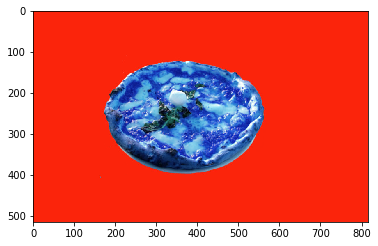

In [3]:
PATH = "images/pizza_bluescreen.jpg"
image = cv2.imread(PATH)
print('This image is of type: ', type(image),
     ' With dimensions :', image.shape)
plt.imshow(image)

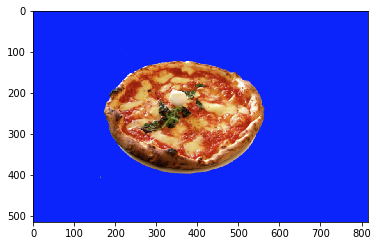

In [5]:
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

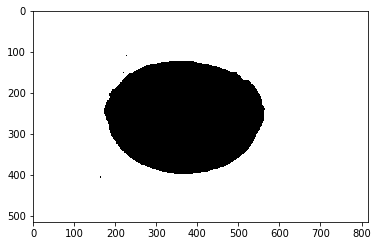

In [9]:
# Defining out color selecting boundaries in RGB values
lower_blue = np.array([0, 0, 230])
upper_blue = np.array([50, 50, 255])

# Definging mask
mask = cv2.inRange(image_copy, lower_blue, upper_blue)

plt.imshow(mask, cmap='gray')

In [10]:
mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

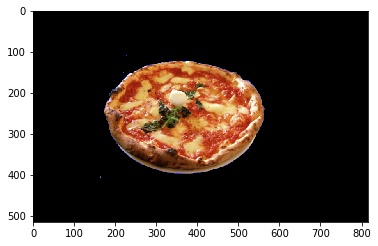

In [11]:
masked_image = np.copy(image_copy)
masked_image[mask != 0] = [0, 0 ,0]
plt.imshow(masked_image)

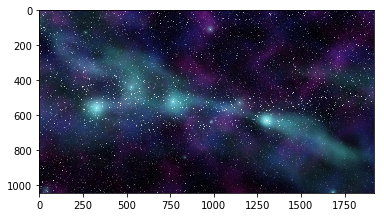

In [13]:
bg_image = cv2.imread("images/space_background.jpg")
bg_image = cv2.cvtColor(bg_image, cv2.COLOR_BGR2RGB)
plt.imshow(bg_image)

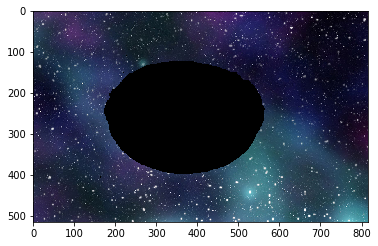

In [16]:
# Croping background and image to 514 * 816
crop_bg = bg_image[0:514, 0:816]
crop_bg[mask == 0] = [0, 0, 0]
plt.imshow(crop_bg)

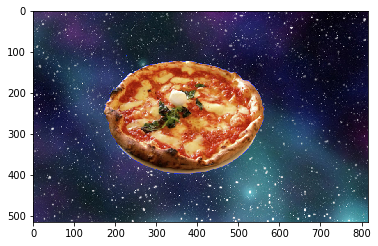

In [18]:
# Adding masked background with masked image
cmplt_image = crop_bg + masked_image
plt.imshow(cmplt_image)